# Figure 1: Single-cell RNA sequencing of BAL fluid reveals myeloid, lymphoid, and epithelial cell populations present in interstitial lung disease.

In [1]:
import os
os.chdir('/g/data/ei56/pa3687/projects/bal-manuscript-2025-revisions/')

In [2]:
import scanpy as sc
import pandas as pd

# Inital setting for plot size
import matplotlib.pyplot as plt
from matplotlib import rcParams

FIGSIZE = (15,10)
rcParams["figure.figsize"] = FIGSIZE

# Plot UMAP with high resolution
from adjustText import adjust_text

# Load data
data = sc.read_h5ad("data/BAL_FINAL.h5ad")

## Figure 1a: Full UMAP of all BAL cells

In [3]:
data

AnnData object with n_obs × n_vars = 92164 × 38592
    obs: 'Sample', 'Pool', 'Doublet', 'Barcode', 'disease_final', 'sex', 'age_at_sampling', 'telomere_length', 'smoking_0_ex1_current2', '10X_chemistry', 'log1p_nFeaturess_RNA_by_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'new_clusters', 'Compartment', 'Cell_Type', 'Cell_Subtype', 'IPF', 'Cell_Sub_subtype'
    obsm: 'X_pca', 'X_scVI', 'X_umap'

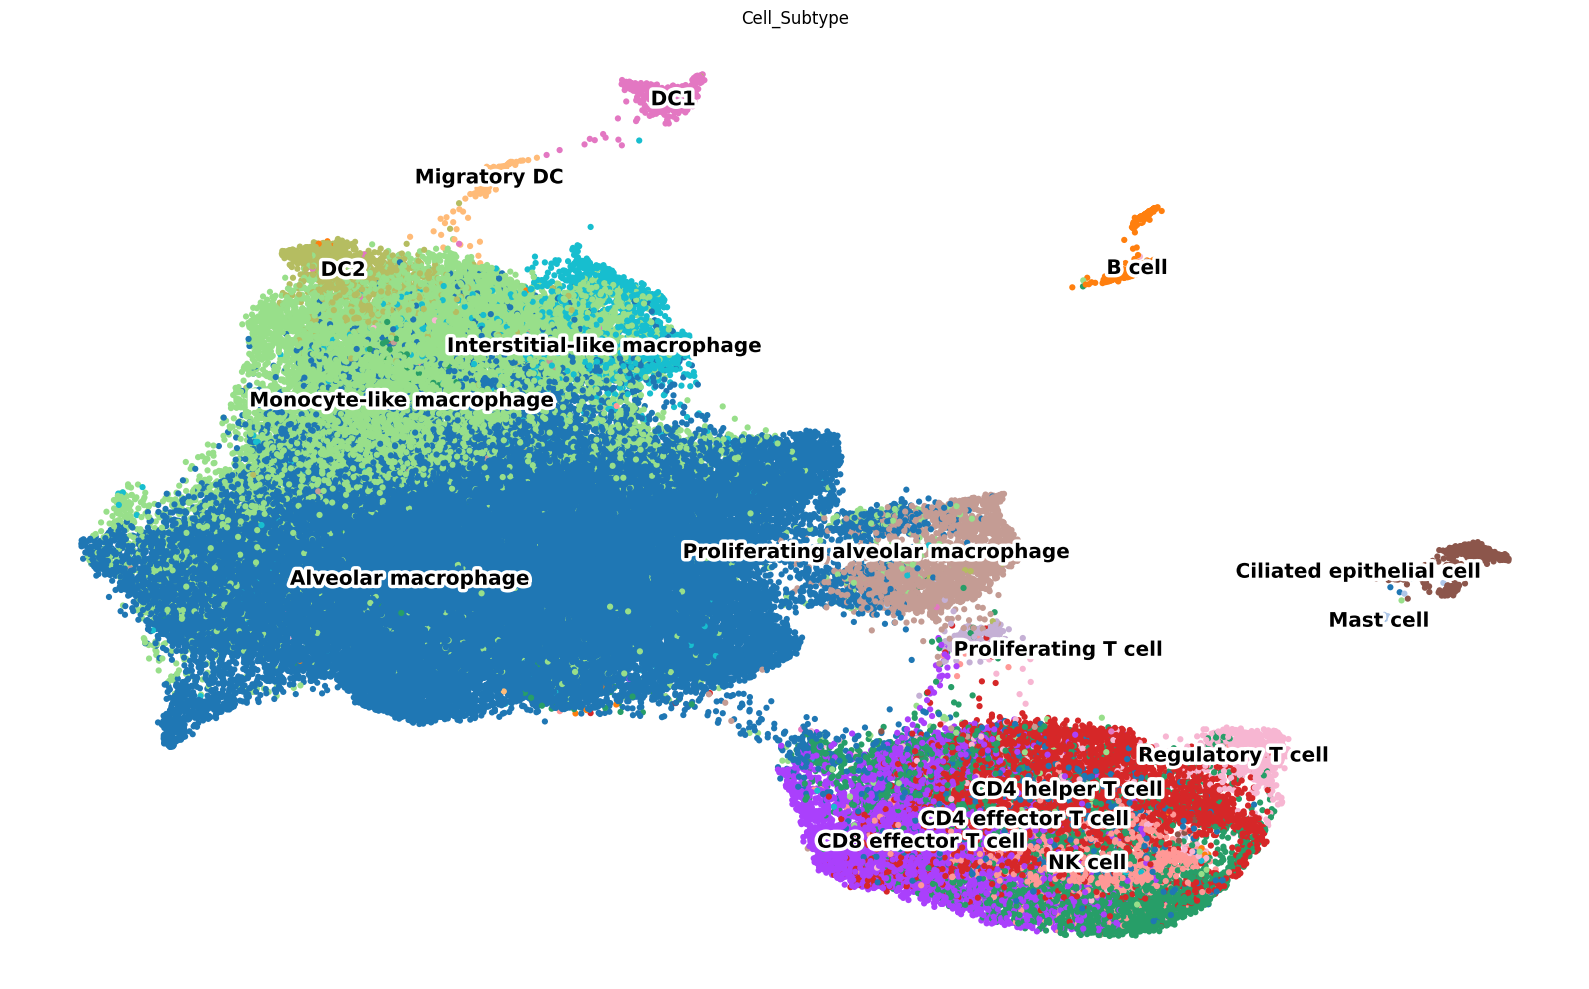

In [12]:
fig, ax = plt.subplots(figsize=(16, 10))

sc.pl.umap(data, color='Cell_Subtype', save=False, frameon=False, 
           legend_loc='on data', title=None, size=80, 
           legend_fontsize='x-large', legend_fontoutline=5,
           ax=ax, show=False)

# Get all text objects
texts = [child for child in ax.get_children() if isinstance(child, plt.Text)]

# Define the subtypes that are overlapping
subtypes_to_adjust = ['Proliferating alveolar macrophage', 'Alveolar macrophage', 
                      'Proliferating T cell', 'Ciliated epithelial cell']

# Filter texts that need repositioning
texts_to_adjust = [text for text in texts if text.get_text() in subtypes_to_adjust]

# Apply adjust_text without arrows
if texts_to_adjust:
    adjust_text(
        texts_to_adjust,
        force_text=(0.5, 0.7),
        force_points=(0.3, 0.5),
        expand_text=(1.3, 1.5),
        expand_points=(1.2, 1.2),
    )

# Clean up axes
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
plt.show()

## Figure 1b: Proportion of cell types by disease

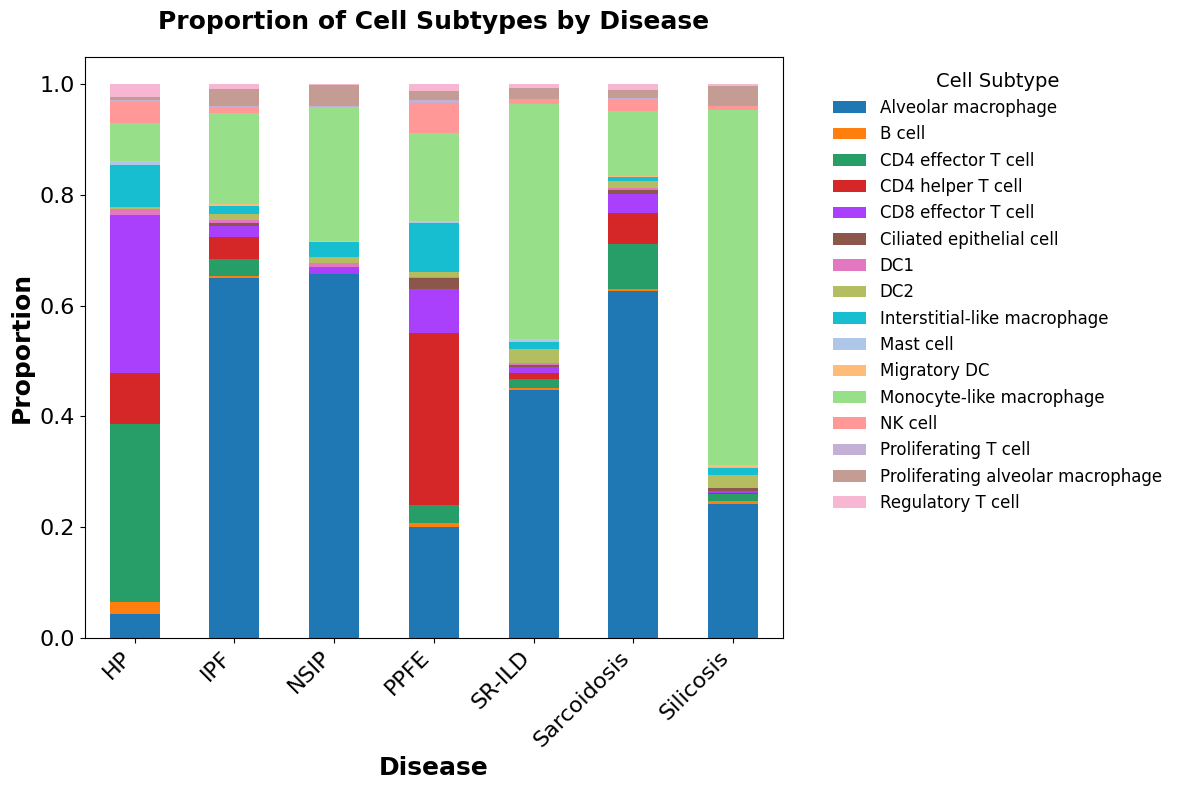

In [14]:
# Get the colors used in the UMAP plot
umap_colors = dict(zip(data.obs['Cell_Subtype'].cat.categories, 
                       data.uns['Cell_Subtype_colors']))

# Now create the proportion plot
proportion = data.obs.groupby('disease_final', observed=True)['Cell_Subtype'].value_counts(normalize=True).unstack().fillna(0)

ax = proportion.plot(kind='bar', stacked=True, figsize=(12, 8), 
                     color=[umap_colors.get(x, '#333333') for x in proportion.columns])
plt.title('Proportion of Cell Subtypes by Disease', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Disease', fontsize=18, fontweight='bold')
plt.ylabel('Proportion', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)

plt.legend(title='Cell Subtype', bbox_to_anchor=(1.05, 1), loc='upper left', 
           fontsize=12, title_fontsize=14, frameon=False)
plt.tight_layout()
plt.show()